## Model Validation

#### Validation Measures:

Accuracy = $\frac{\sum(y_{true} == y_{predicted})}{len(y_{true})}$

Precision = $\frac{tp}{tp+fp}$, of the loans the model flags as "is_bad", what percentage will actually default?

Recall = $\frac{tp}{tp+fn}$, of all the loans that default, what percentage did the model catch?

F1-Score = $\frac{2 * (precision * recall)}{(precision + recall)}$, If precision and recall = 1, then F1-Score will equal 1. Best value = 1, worst value = 0.

In [1]:
model_type = 'xgboost_model_2'
version = '0.1.1556570523'

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [3]:
def validate_metrics(y_true, y_pred):

    accuracy = sum([y1==y2 for y1,y2 in zip(y_true.values, y_pred)])/len(y_true)
    precision = precision_score(y_true=y_true, y_pred=y_pred)
    recall = recall_score(y_true=y_true, y_pred=y_pred)
    f_score  = f1_score(y_true=y_true, y_pred=y_pred)
    
    print('F-Score: %f' % f_score)
    print('Additional Metrics:')
    print('  Accuracy:  %f' % accuracy)
    print('  Precision: %f' % precision)
    print('  Recall:    %f' % recall)
    
    print(sum(y_pred))

In [4]:
filepath = 'saved_models/{}/{}/'.format(model_type, version)

### High Level Model Metrics

In [5]:
model_training_data = pickle.load(open(filepath + 'training_data.p', 'rb'))
models_to_validate = dict()

models_to_validate['model_trained_on_validation_split.p'] = {
    'X':model_training_data.X_validate,
    'y':model_training_data.y_validate
}

for fold in model_training_data.folds:
    models_to_validate['model_trained_on_k_{}_data.p'.format(fold)] = {
        'X':model_training_data.folds[fold]['X_test'],
        'y':model_training_data.folds[fold]['y_test']
    }

for model_name in models_to_validate:
    print(model_name)
    model = pickle.load(open(filepath + model_name, 'rb'))
    y_pred = model.predict(models_to_validate[model_name]['X'])    
    validate_metrics(y_true=models_to_validate[model_name]['y'], y_pred=y_pred)
    print()
    print()

model_trained_on_validation_split.p
F-Score: 0.156098
Additional Metrics:
  Accuracy:  0.881426
  Precision: 0.941176
  Recall:    0.085106
17


model_trained_on_k_fold_0_data.p
F-Score: 0.139130
Additional Metrics:
  Accuracy:  0.880290
  Precision: 0.941176
  Recall:    0.075117
17


model_trained_on_k_fold_1_data.p
F-Score: 0.223140
Additional Metrics:
  Accuracy:  0.886267
  Precision: 0.931034
  Recall:    0.126761
29


model_trained_on_k_fold_2_data.p
F-Score: 0.255144
Additional Metrics:
  Accuracy:  0.890436
  Precision: 1.000000
  Recall:    0.146226
31


model_trained_on_k_fold_3_data.p
F-Score: 0.194093
Additional Metrics:
  Accuracy:  0.884383
  Precision: 0.920000
  Recall:    0.108491
25


model_trained_on_k_fold_4_data.p
F-Score: 0.180258
Additional Metrics:
  Accuracy:  0.884383
  Precision: 1.000000
  Recall:    0.099057
21




In [6]:
thresholds = np.arange(0.1,.99,.01)

Text(0.5, 1.0, 'Precision as a function of threshold')

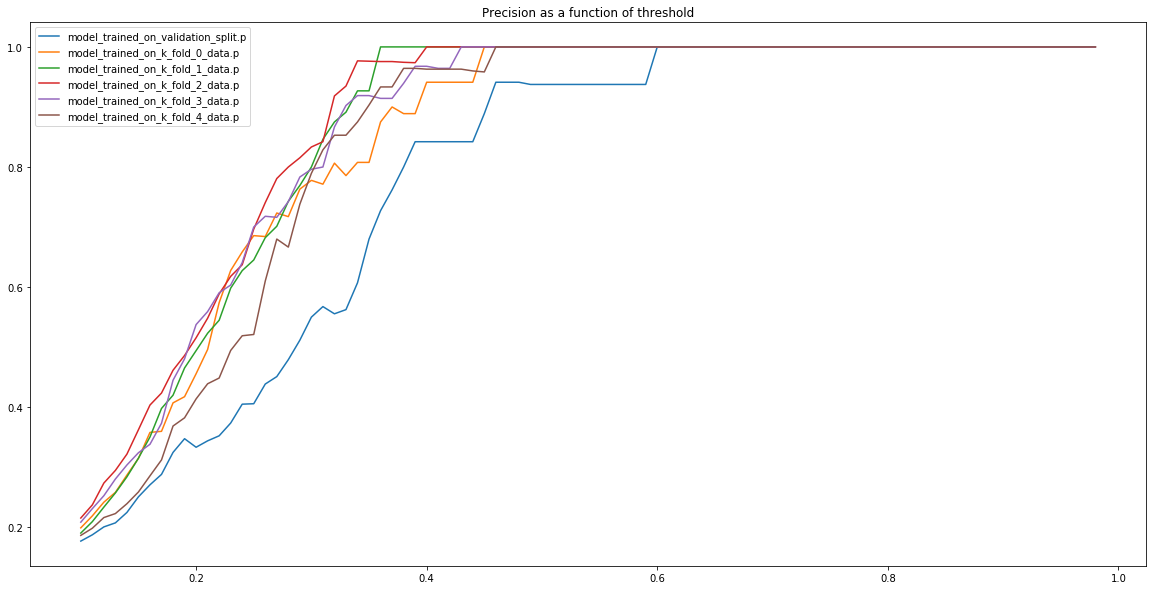

In [7]:
plt.figure(figsize=[20,10])
precision = dict()

for model_name in models_to_validate:
    for thresh in thresholds:
        probabilities = np.asarray([x[1] for x in model.predict_proba(models_to_validate[model_name]['X'])])
        y_true = models_to_validate[model_name]['y']
        high_prob_defaulters = y_true[probabilities > thresh]
        precision[thresh] = np.sum(high_prob_defaulters)/len(high_prob_defaulters)        
    precision_df = pd.DataFrame(precision).transpose()
    plt.plot(precision_df, label=model_name)
plt.legend()
plt.title('Precision as a function of threshold')

Text(0.5, 1.0, 'Number of predicted defaults as a function of threshold')

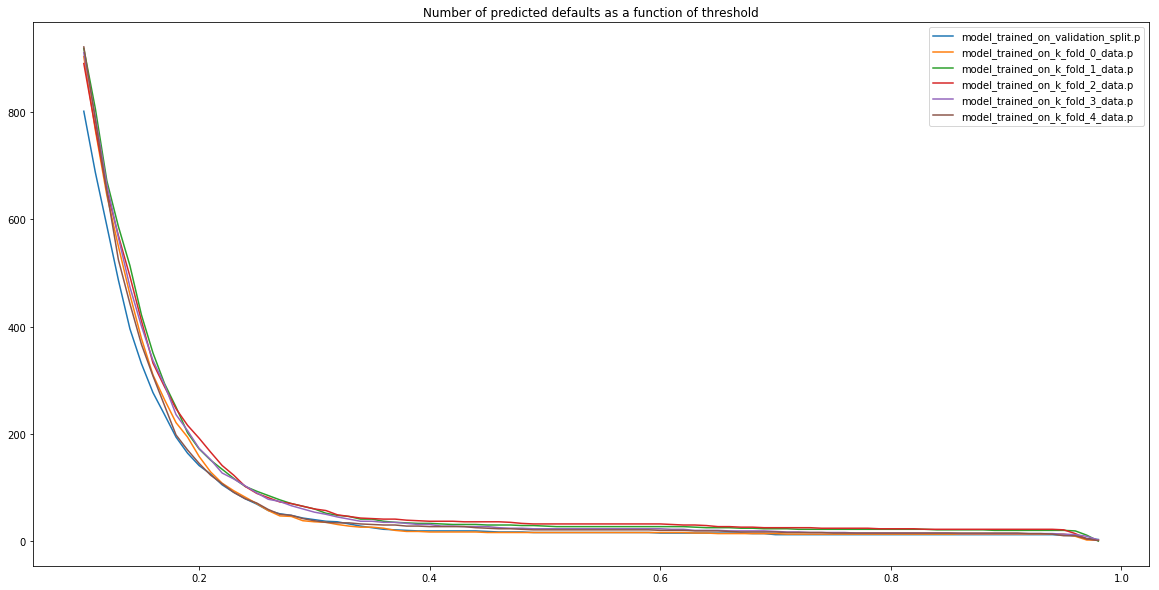

In [8]:
plt.figure(figsize=[20,10])
prediction_count = dict()
for model_name in models_to_validate:
    for thresh in thresholds:
        probabilities = np.asarray([x[1] for x in model.predict_proba(models_to_validate[model_name]['X'])])
        y_true = models_to_validate[model_name]['y']
        high_prob_defaulters = y_true[probabilities > thresh]
        prediction_count[thresh] = len(high_prob_defaulters)
    prediction_count_df = pd.DataFrame(prediction_count, index=[0]).transpose()
    plt.plot(prediction_count_df, label=model_name)
plt.legend()
plt.title('Number of predicted defaults as a function of threshold')